In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
other=pd.read_csv('/other_3.csv')
worker=['Юрист',	'Бухгалтер',	'Маркетолог',	'HR',	'Копирайтер',	'Клиентский менеджер',	'Консультант',	'Дизайнер',	'Российская юридическая сфера']
other['Количество ролей'] = other[worker].sum(axis=1)
#под использованием ка юриста понимаем шаблонные доки. Проверку ошибок и нестыковок. ПОлноценную работу юриста из-за малой базы знаний и сложности не может сейчас поддержать никто. Нужно дотюнивать
other.head(n=10)

,Копилот,Интегрируемость,Понятная тарифная сетка,"Стоимость (за 1 запрос, USD)",Диалоговые ограничения,Ограничено ли кол-во запросов,Юрист,Бухгалтер,Маркетолог,HR,Копирайтер,Клиентский менеджер,Консультант,Дизайнер,Российская юридическая сфера,Количество ролей
0,Dynamics 365 Copilot,0,1,0.1500,8000,1,1,1,1,1,1,1,1,0,0,7
1,Microsoft 365 Copilot,0,1,0.0600,6000,1,1,1,1,1,1,1,1,0,0,7
2,GitHub Copilot,1,1,0.0300,4000,1,0,0,0,0,0,0,0,0,0,0
3,Intuit Assist,0,1,0.3000,3000,1,0,1,0,0,0,0,1,0,0,2
4,Shopify Sidekick,0,1,0.0360,2000,1,0,0,1,0,1,1,1,0,0,4
5,Zoho Zia Copilot,1,1,0.0600,4000,1,1,1,1,1,1,1,1,0,0,7
6,Canva Magic Studio,1,1,0.0260,2000,1,0,0,1,0,1,0,0,1,0,3
7,Notion AI + Templates,0,1,0.0200,2000,1,0,0,1,1,1,0,0,0,0,3
8,YandexGPT,1,1,0.0009,32000,1,1,1,1,1,1,1,1,0,0,7
9,GigaChat,1,1,0.0007,8000,1,1,1,1,1,1,1,1,0,1,8


In [ ]:
#основные параметры - количество поддерживаемых ролей, стоимомть, диалоговые ограничения и интегрируемость

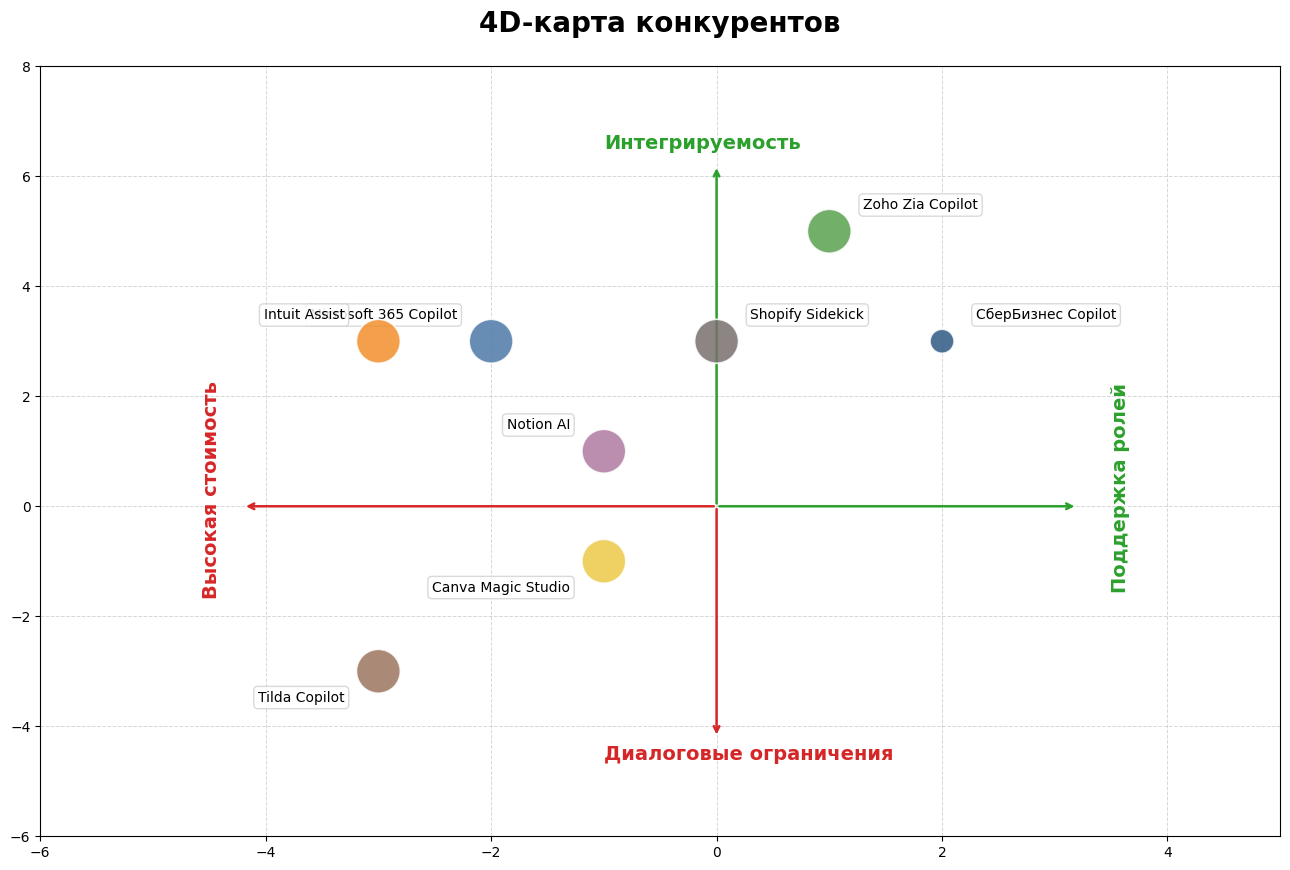

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Данные
data = {
    "Product": [
        "Microsoft 365 Copilot", "Intuit Assist", "Shopify Sidekick", "Zoho Zia Copilot",
        "Canva Magic Studio", "Notion AI", "Tilda Copilot", "СберБизнес Copilot",
    ],
    "Roles_Score": [6, 3, 2, 5, 2, 4, 1, 4],
    "Cost_Score":   [2, 4, 8, 6, 7, 5, 6, 8],
    "Integr_Score": [8, 6, 7, 9, 5, 6, 4, 7],
    "Dialog_Score": [5, 7, 6, 6, 4, 5, 3, 6]
}

df = pd.DataFrame(data)

df["X"] = df["Roles_Score"] - (10 - df["Cost_Score"])
df["Y"] = df["Integr_Score"] - (10 - df["Dialog_Score"])


colors = [
    "#4e79a7",
    "#f28e2b",
    "#79706e",
    "#59a14f",
    "#edc948",
    "#b07aa1",
    "#9c755f",
    "#2e5984",
]

sizes = [1000] * 7 + [300]
plt.figure(figsize=(16, 10))  #
ax = plt.gca()

'''# Сетка и центральные оси
ax.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.6)
ax.axvline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.6)'''

scatter = ax.scatter(df["X"], df["Y"], c=colors, s=sizes, alpha=0.85, edgecolors='white', linewidth=1.2, zorder=5)

for i, row in df.iterrows():
    ha = 'left' if row["X"] >= 0 else 'right'
    va = 'bottom' if row["Y"] >= 0 else 'top'
    offset_x = 0.3 if row["X"] >= 0 else -0.3
    offset_y = 0.35 if row["Y"] >= 0 else -0.35
    ax.text(row["X"] + offset_x, row["Y"] + offset_y, row["Product"],
            fontsize=10, ha=ha, va=va,
            fontweight='medium',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.85, edgecolor="lightgray"))


ax.set_title("4D-карта конкурентов", fontsize=20, fontweight='bold', pad=25)

margin = 3
ax.set_xlim(df["X"].min() - margin, df["X"].max() + margin)
ax.set_ylim(df["Y"].min() - margin, df["Y"].max() + margin)

arrow_props = dict(arrowstyle='->', lw=1.8)

ax.annotate('', xy=(df["X"].max() + 1.2, 0), xytext=(0, 0), arrowprops={**arrow_props, 'color': '#2ca02c'})
ax.text(df["X"].max() + 1.5, -1.5, 'Поддержка ролей', color='#2ca02c', fontsize=14, fontweight='bold', ha='left', rotation=90)


ax.annotate('', xy=(df["X"].min() - 1.2, 0), xytext=(0, 0), arrowprops={**arrow_props, 'color': '#d62728'})
ax.text(df["X"].min() - 1.4, -1.6, 'Высокая стоимость', color='#d62728', fontsize=14, fontweight='bold', ha='right', rotation=90)

ax.annotate('', xy=(0, df["Y"].max() + 1.2), xytext=(0, 0), arrowprops={**arrow_props, 'color': '#2ca02c'})
ax.text(-1.0, df["Y"].max() + 1.5, 'Интегрируемость', color='#2ca02c', fontsize=14, fontweight='bold', ha='left')

ax.annotate('', xy=(0, df["Y"].min() - 1.2), xytext=(0, 0), arrowprops={**arrow_props, 'color': '#d62728'})
ax.text(-1.0, df["Y"].min() - 1.6, 'Диалоговые ограничения', color='#d62728', fontsize=14, fontweight='bold', ha='left')

ax.grid(True, linestyle='--', alpha=0.5, linewidth=0.7)


plt.show()

#наше решение, по-хорошему бы должно оказаться в правом верхнем углу

## РАССЧЁТ TAM, SAM, SOM

оптимистичный прогноз: в 2025 году в россии около 6,7 предприятий малого и среднего бизнеса - наш PAM
TAM: 2 млн (количество предпринимателей - клиентов альфы)
По итогам CustDev: примерно 2/3-3/4 респондентов заинтересованны в решении, треть имеет потребность в "умном помощнике"
SAM ~ 1.5 миллиона пользователей
SOM ~ 0,75 Миллионов пользователей





### Примерные метрики для оценки прохождения тетстов

фокус-группа на CSAT (шкала от 1 до 10), NPS (5 бальная шкала)
Latency (задержка от вопроса до ответа)
Hallucination Rate , Fallback Rate
Accuracy (не в привычном смысле, сравнение ответа с каноном по смыслу)
Возможно я глючу, но уменьшение HR и рост Accuracy можно фиксировать при помощи bag of words препроцессинга? Полуавтоматом получится. Единственное, как проверить смысл последовательности слов....

Итоги CustDev - у малого бизнеса, несмотря на обширность возможностей и гос.поддержку возникают проблемы с реализацией гос.закупок и тендеров. Из-за недоступности информации, откуда бертся стереотип о сложности работы с такими программами.

Итоги CustDev по респондентам:

1) формации в разных источниках (НК РФ, КонсультантПлюс, ЭлКод,
профессиональные сообщества).
Отсутствие единых, структурированных, актуальных и удобных
источников по господдержке (субсидии, квоты, тендеры и прочее)
Низкая доступность и прозрачность данных о мерах поддержки,
конкурсной основе и прочих
Высокая нагрузка на внимание при работе с шаблонными, но
критичными документами (налоговые декларации, отчёты, письма в
госорганы, но с последним у нас тоже приколюхи из-за плохой мотивации
этих самых органов)
Отсутствие инструмента для автоматической верификации, но
автозаполнения бы не хотелось из-за страха перед низкой точностью,
сложностью и чувствительностью данных
Отказ от нейротехнологий из-за страха перед галюнами и утечкой
Несмотря на высокую квалификацию, даже профильные специалисты не
в курсе всех мер поддержки и предложений
Идеальная модель помощника «умная» проверка документации +
агрегатор информации с функцией анализа применимости в конкретной
ситуации.
2) Привлечение клиентов (продажи) — ключевая бизнес-проблема, которая сильно влияет на доход.
Сложность и страх перед финансово-юридическими вопросами — передача на аутсорс вызвана непониманием темы и страхом ошибок.
Нежелание погружаться в рутину (например, в тендеры) — мешает участию в госзакупках, хотя интерес есть.
Зависимость от ручных процессов — например, ручной поиск и анализ тендеров, правка документов.
Потребность в автоматизации рутины без потери креативности — хочет использовать ИИ для скучных задач, но оставить пространство для творчества.
Отсутствие единого удобного инструмента для работы с тендерами — нужна платформа с автоматизацией и простым интерфейсом.
3) Есть проблемы с верификацией работы, нет уверенности в подрядчиках
Колоссальная нехватка времени, в том числе и на знакомство с новыми технологиями. Недоверие к тендерным программам и другим мерам поддержки, как к гомударственным, так и к комерческим. Сейчас, по мнению респондента, "программа не работает", из-за неоднородности, недоверия к информации из источников. Признаёт, что за автоматизацией бедещее.
4) Проблема масштабируемости и нехватки рабочих рук. Влияние стереотипа, что тендеры и госзакупки это только про масштабные проекты, откуда страх привлечь клиентов и не справиться, нежелание разбираться в системе. Недоступность нужной информации



In [ ]:
CJM = pd.read_csv('/CJM.csv')

Основные пользовательские стори (user story):

1) Как владелец малой юридической фирмы, я хочу видеть только те тендеры, где минимальный порог участия ≤ 3 млн ₽, чтобы не тратить время на конкурсы, в которых я заведомо не пройду по финансам.
2) Как менеджер по развитию, я хочу получать ежедневную подборку тендеров перед глазами, чтобы анализировать ситуацию "in moment" и корректировать свои действия
3) Как предприниматель без опыта участия в госзакупках, персонализированное ранжирование предложений, чтобы не тратить 20 часов на подготовку заявки с 2% вероятностью выиграть.
4) Как бухгалтер, я хочу автоматически проверить, подходит ли наша деятельность и ИНН к конкретному тендеру, чтобы не пропустить дисквалификацию на этапе документации.
5) Как руководитель, я хочу фильтровать тендеры по регионам, где у нас есть офис/представительство, чтобы правильно управлять собственными ресурсами.
6) Как контрактный управляющий, я хочу загрузить готовую документацию (заявку, гарантию, договор) и получить проверку на соответствие формату и требованиям заказчика, чтобы избежать отклонения из-за технических ошибок (нумерация, шрифт, подпись).
7) Как владелец бренда (например, ювелирного), я хочу фильтровать по категориям ОКПД2 / КТРУ, например «подарки и сувениры», чтобы находить госзаказы на подарки к праздникам, а не пытаться пролезть в «медицинские изделия».
8) Как предприниматель, я хочу видеть сроки подачи и исполнения, возможно, с напоминаниями за 3 и 1 день, чтобы ничего не пропустить в потоке ежедневных задач.
9) Как руководитель IT-проекта, я хочу экспортировать список тендеров с фильтрами, чтобы делиться с командой или вести внутренний трекер в Notion/таблице. (можно спарсить главную)
10) Как пользователь, который не верит в честность, я хочу видеть только реальные и реализуемые тендеры, а не запущенные специально под какую-то компанию/команду.
11) Как участник с нестандартной услугой (например, «обучение сотрудников»), я хочу искать по ключевым словам в техзадании, а не только по названию закупки,
потому что часто название — «оказание услуг», а суть — в приложении или спецификации.

Фичи, что сможем реализовать на следующих этапах (по опросам пользователей будут полезны): 

speech-to-text для обработки голосовых входящих, интеграция с банком для автовыгрузки информации о бизнесе, возможность выгрузки предложений в разных форматах по нажатию кнопки, аналитика по тендерам по поставщику (?)